<a href="https://www.kaggle.com/code/sanjanchaudhari/iris-flower-classification-analysis?scriptVersionId=140368354" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![](https://www.atozflowers.com/wp-content/uploads/2017/11/Iris_versicolor_3-1024x768.jpg)

<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid green;">IRIS FLOWERS CLASSIFICATION</h1>
</center>


![](https://miro.medium.com/v2/resize:fit:720/1*YYiQed4kj_EZ2qfg_imDWA.png)

<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid green;">1. IMPORT LIBRARIES</h1>
</center>

In [1]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split  # Fix import here
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid green;">2. Iris ☀️Dataset💥 EDA and Prediction💯</h1>
</center>


In [2]:
Iris=pd.read_csv('../input/iris-flower-dataset/IRIS.csv')

Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
Iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
42,4.4,3.2,1.3,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
63,6.1,2.9,4.7,1.4,Iris-versicolor
95,5.7,3.0,4.2,1.2,Iris-versicolor
28,5.2,3.4,1.4,0.2,Iris-setosa


In [5]:
Iris['species']=Iris['species'].str.replace('Iris-','')

In [6]:
Iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid green;">Sepal Length & Width</h1>
</center>


Text(0, 0.5, 'Length/Width')

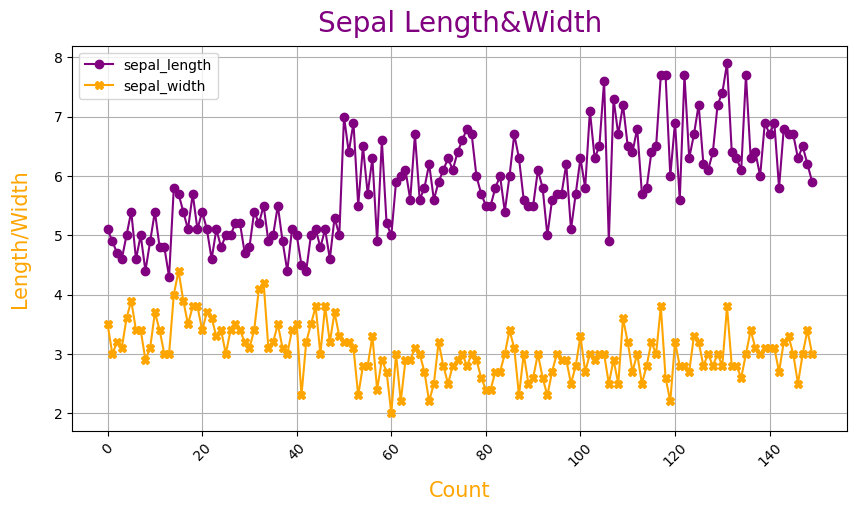

In [7]:
#Iris['sepal_length'].plot(kind='hist')
Iris['sepal_length'].plot(kind='line',legend=True,marker='o',color='purple',figsize=(10,5),grid=True,rot=45)
Iris['sepal_width'].plot(kind='line',legend=True,marker="X",color='orange',figsize=(10,5),grid=True,rot=45)
plt.title('Sepal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'purple','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'orange','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'orange','verticalalignment': 'baseline',})

<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid green;">Sepal length is greater then Sepal width</h1>
</center>

Text(0, 0.5, 'Length/Width')

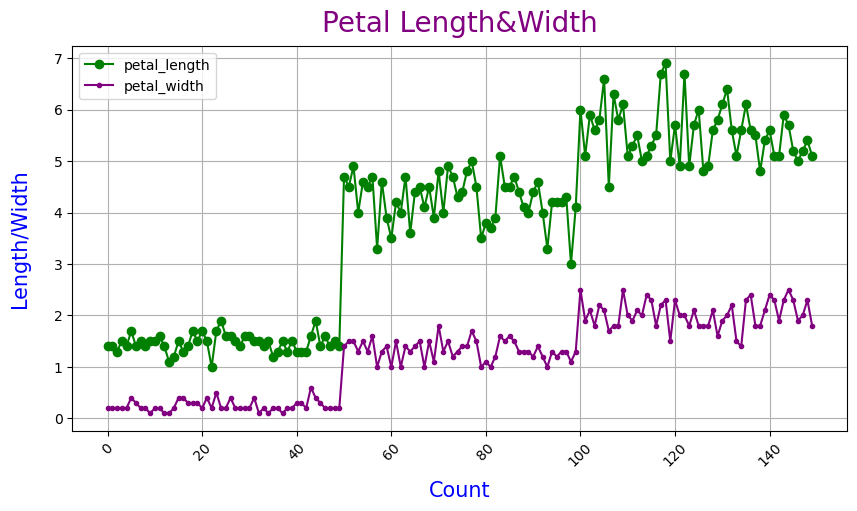

In [8]:
Iris['petal_length'].plot(kind='line',legend=True,marker='o',color='g',figsize=(10,5),grid=True,rot=45)
Iris['petal_width'].plot(kind='line',legend=True,marker=".",color='purple',figsize=(10,5),grid=True,rot=45)
plt.title('Petal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'purple','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid green;">Petal length is greater then Petal width</h1>
</center>

Text(0, 0.5, 'Length/Width')

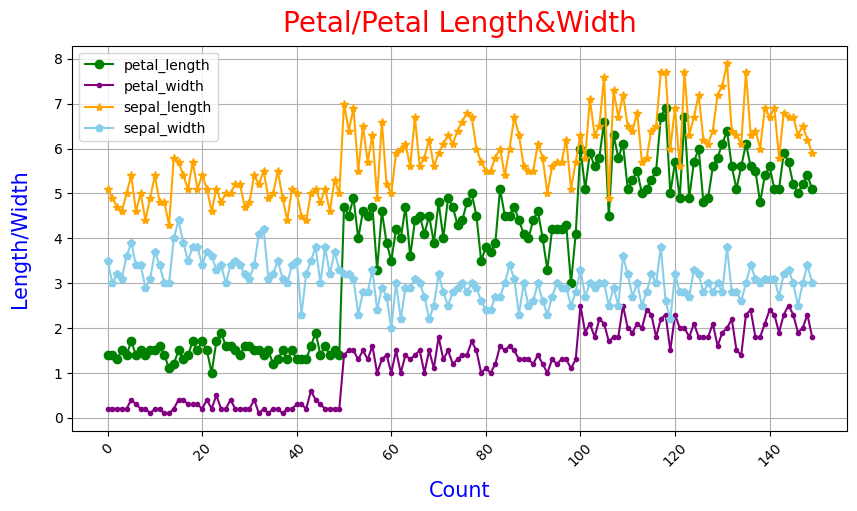

In [9]:
Iris['petal_length'].plot(kind='line',legend=True,marker='o',color='g',figsize=(10,5),grid=True,rot=45)
Iris['petal_width'].plot(kind='line',legend=True,marker=".",color='purple',figsize=(10,5),grid=True,rot=45)
Iris['sepal_length'].plot(kind='line',legend=True,marker="*",color='orange',figsize=(10,5),grid=True,rot=45)
Iris['sepal_width'].plot(kind='line',legend=True,marker="p",color='skyblue',figsize=(10,5),grid=True,rot=45)
plt.title('Petal/Petal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

In [10]:
# Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.
Iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

 Dividing data into features and labels

In [11]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
X = Iris[feature_columns].values
y = Iris['species'].values

# Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

2.5 Label encoding

In [12]:
le = LabelEncoder()
y = le.fit_transform(y)


 Spliting dataset into training set and test set
 
Let's split dataset into training set and test set, to check later on whether or not our classifier works correctly

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid green;">3. Data Visualization</h1>
</center>

# 1. Box plot for each feature by species

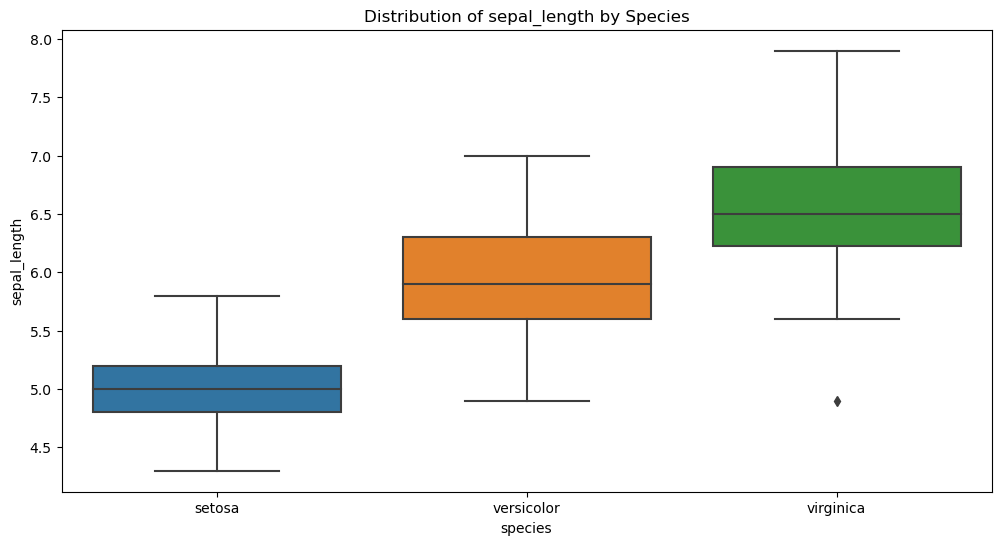

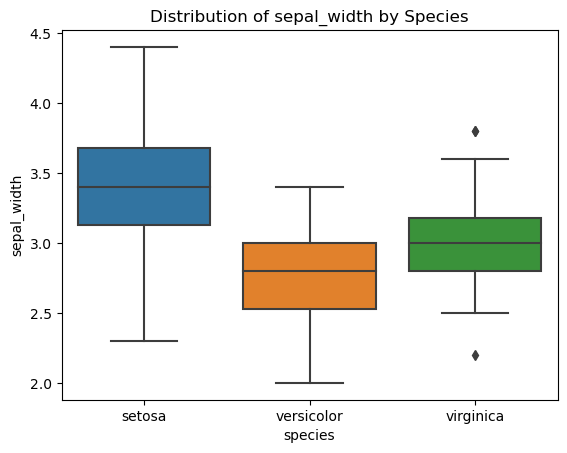

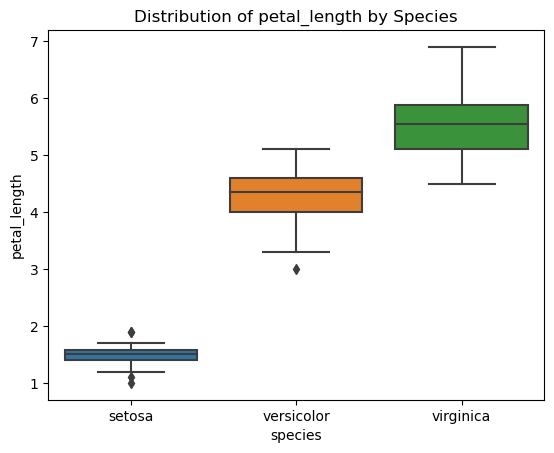

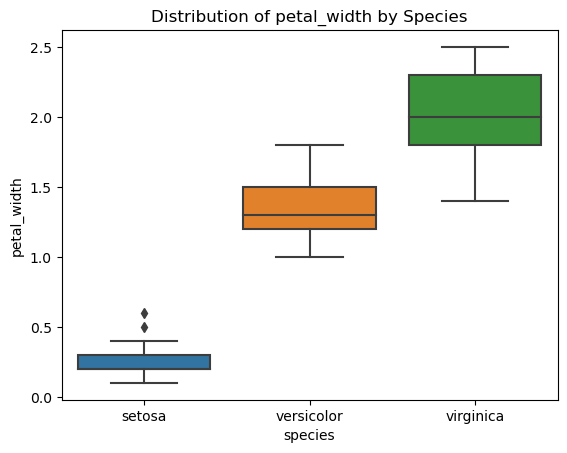

In [14]:

plt.figure(figsize=(12, 6))
for col in Iris.columns[:-1]:  # Exclude the species column
    sns.boxplot(x='species', y=col, data=Iris)
    plt.title(f'Distribution of {col} by Species')
    plt.show()

# 3. Parallel Coordinates

Parallel coordinates is a plotting technique for plotting multivariate data. It allows one to see clusters in data and to estimate other statistics visually. Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.

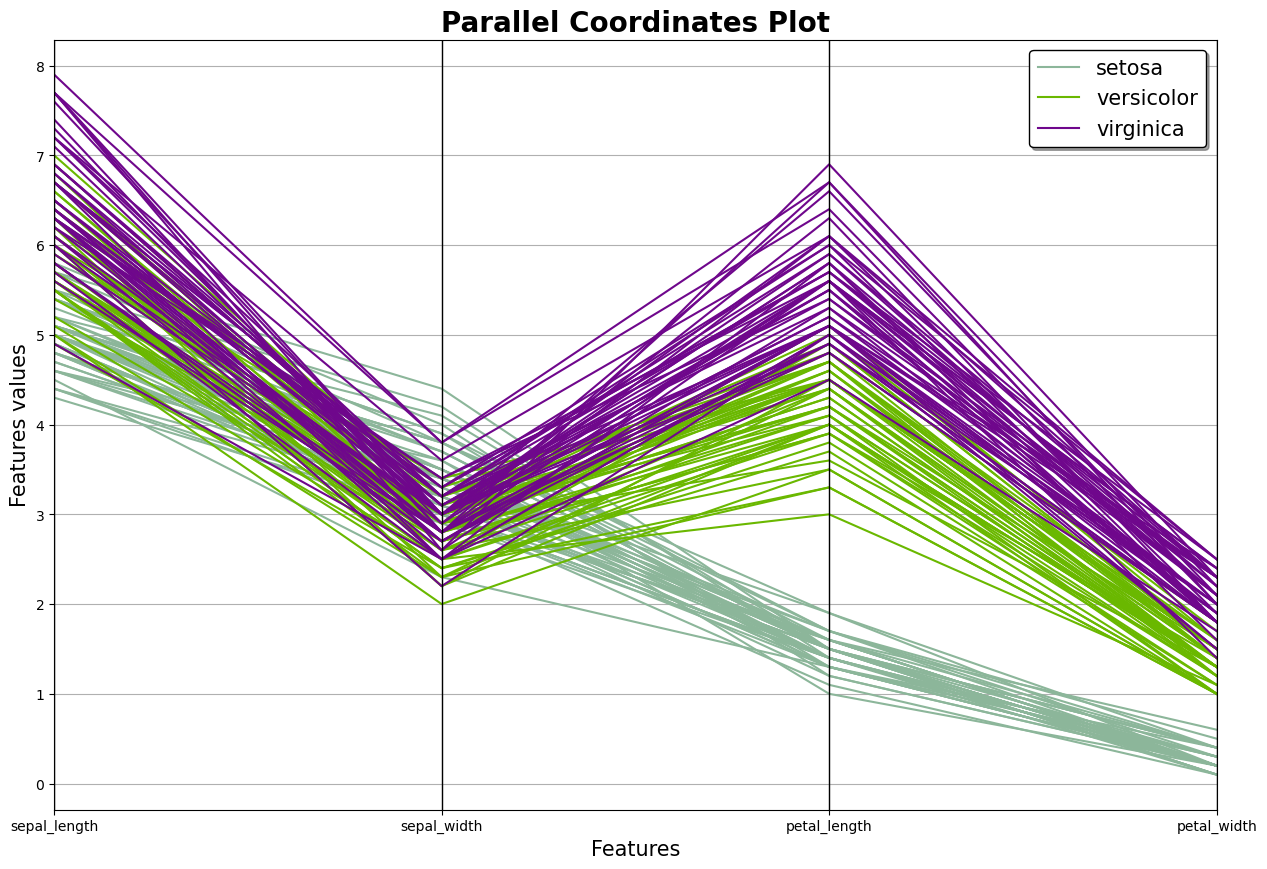

In [15]:
plt.figure(figsize=(15, 10))
parallel_coordinates(Iris, "species")  # Corrected line
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()


# 3. Andrews Curves

Andrews curves allow one to plot multivariate data as a large number of curves that are created using the attributes of samples as coefficients for Fourier series. By coloring these curves differently for each class it is possible to visualize data clustering. Curves belonging to samples of the same class will usually be closer together and form larger structures.

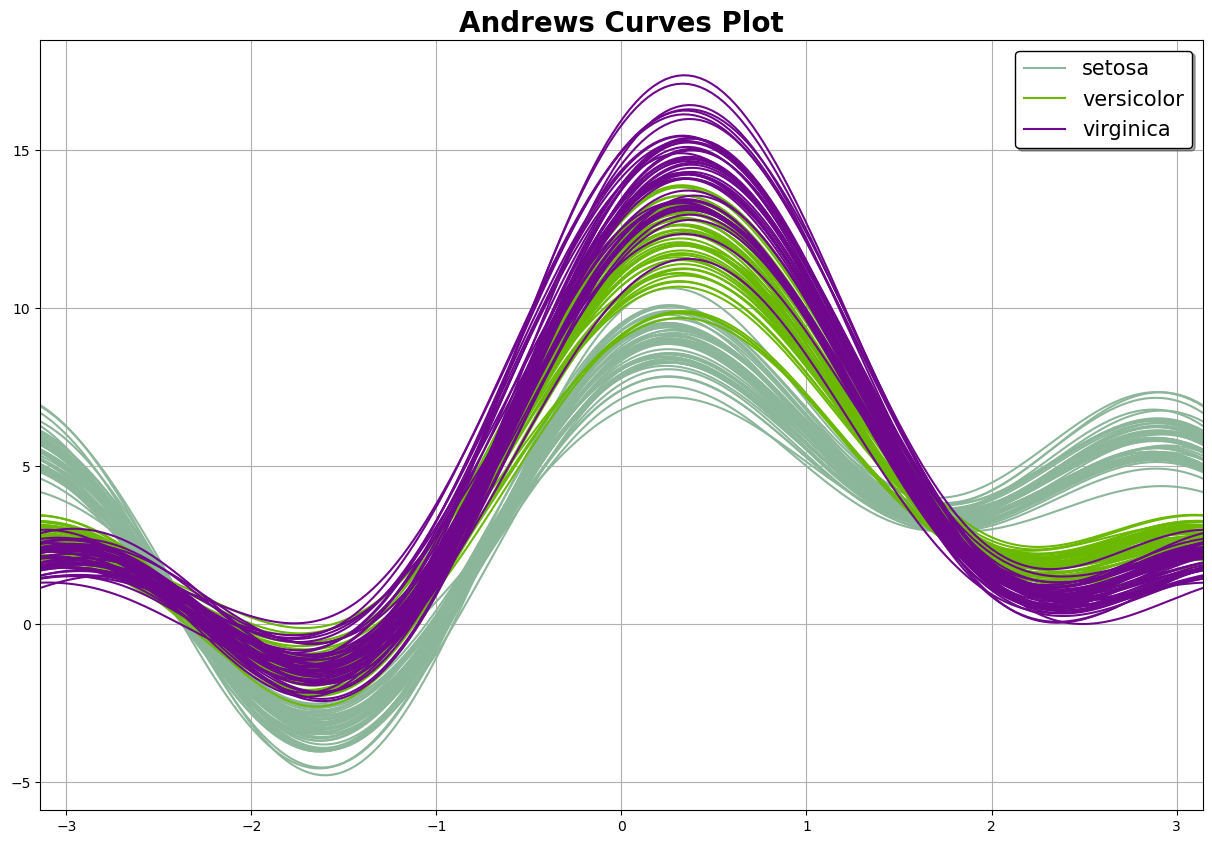

In [16]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(Iris, "species")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

# 4. Pairplot

Pairwise is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

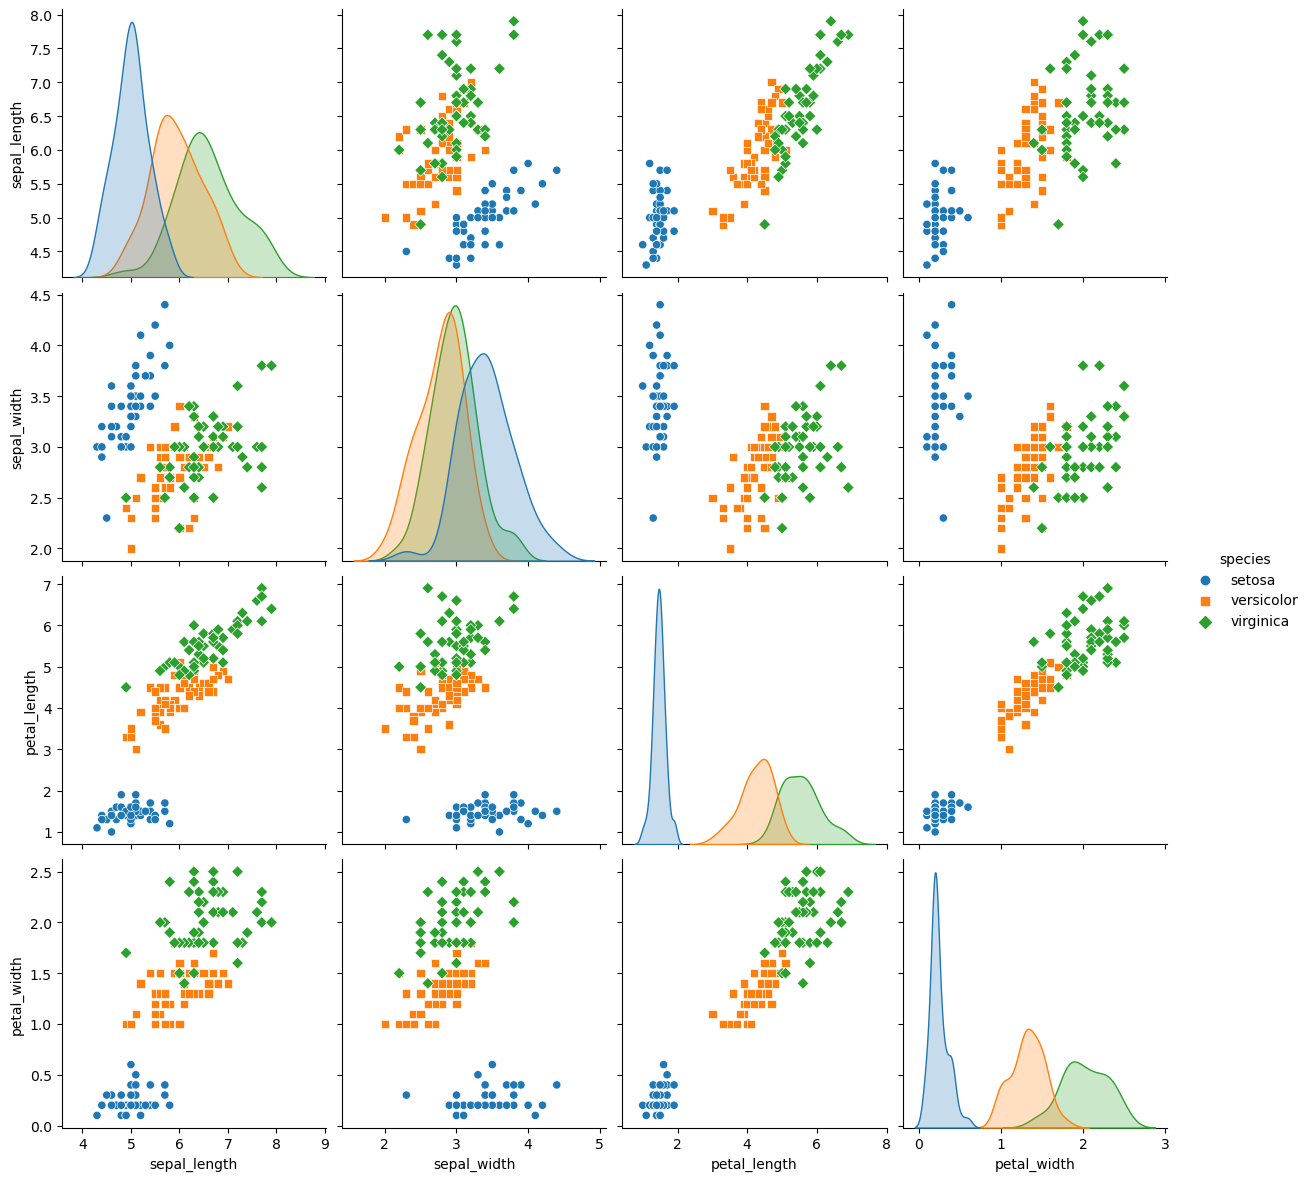

In [17]:
plt.figure()
sns.pairplot(Iris, hue = "species", size=3, markers=["o", "s", "D"])
plt.show()

<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid green;">4. Using KNN for classification</h1>
</center>




# 1. Making predictions

In [18]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# 2. Evaluating predictions

Building confusion matrix:



In [19]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Calculating model accuracy:



In [20]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


# 3. Using cross-validation for parameter tuning:¶


In [21]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

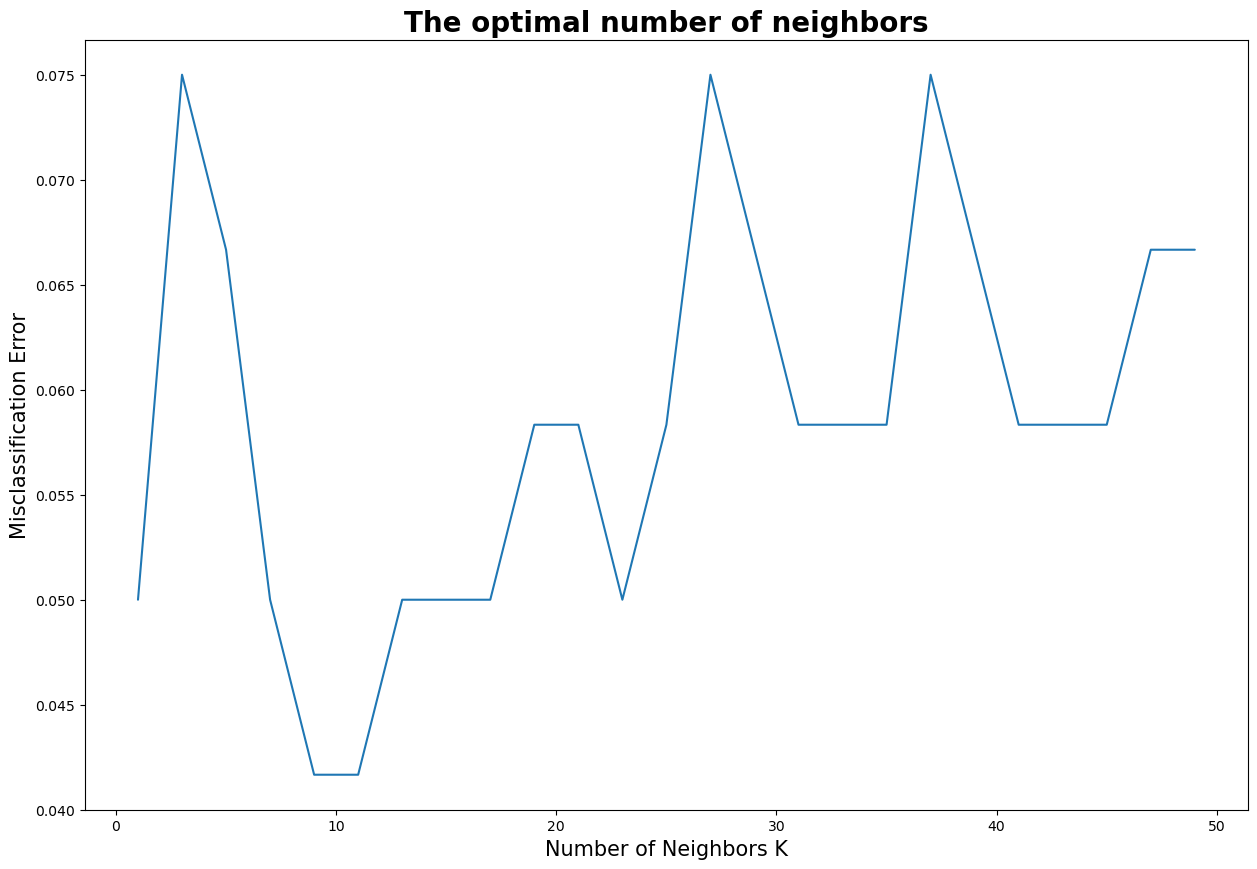

In [22]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [23]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


# 4. My own KNN implementation


In [24]:

import scipy as sp

class MyKNeighborsClassifier():
    """
    My implementation of KNN algorithm.
    """
    
    def __init__(self, n_neighbors=5):
        self.n_neighbors=n_neighbors
        
    def fit(self, X, y):
        """
        Fit the model using X as array of features and y as array of labels.
        """
        n_samples = X.shape[0]
        # number of neighbors can't be larger then number of samples
        if self.n_neighbors > n_samples:
            raise ValueError("Number of neighbors can't be larger then number of samples in training set.")
        
        # X and y need to have the same number of samples
        if X.shape[0] != y.shape[0]:
            raise ValueError("Number of samples in X and y need to be equal.")
        
        # finding and saving all possible class labels
        self.classes_ = np.unique(y)
        
        self.X = X
        self.y = y
        
    def predict(self, X_test):
        
        # number of predictions to make and number of features inside single sample
        n_predictions, n_features = X_test.shape
        
        # allocationg space for array of predictions
        predictions = np.empty(n_predictions, dtype=int)
        
        # loop over all observations
        for i in range(n_predictions):
            # calculation of single prediction
            predictions[i] = single_prediction(self.X, self.y, X_test[i, :], self.n_neighbors)

        return(predictions)

In [25]:
def single_prediction(X, y, x_train, k):
    
    # number of samples inside training set
    n_samples = X.shape[0]
    
    # create array for distances and targets
    distances = np.empty(n_samples, dtype=np.float64)

    # distance calculation
    for i in range(n_samples):
        distances[i] = (x_train - X[i]).dot(x_train - X[i])
    
    # combining arrays as columns
    distances = sp.c_[distances, y]
    # sorting array by value of first column
    sorted_distances = distances[distances[:,0].argsort()]
    # celecting labels associeted with k smallest distances
    targets = sorted_distances[0:k,1]

    unique, counts = np.unique(targets, return_counts=True)
    return(unique[np.argmax(counts)])

In [26]:
# Instantiate learning model (k = 3)
my_classifier = MyKNeighborsClassifier(n_neighbors=3)

# Fitting the model
my_classifier.fit(X_train, y_train)



In [27]:
# Predicting the Test set results
my_y_pred = my_classifier.predict(X_test)
accuracy = accuracy_score(y_test, my_y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid green;">Thank You</h1>
</center>